<a href="https://colab.research.google.com/github/JhaAkansha/FraudDetection/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Bank Account Fraud.csv')
print(df.head())

   fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           0     0.3               0.986506                         -1   
1           0     0.8               0.617426                         -1   
2           0     0.8               0.996707                          9   
3           0     0.6               0.475100                         11   
4           0     0.9               0.842307                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                            25            40            0.006735   
1                            89            20            0.010095   
2                            14            40            0.012316   
3                            14            30            0.006991   
4                            29            40            5.742626   

   intended_balcon_amount payment_type  zip_count_4w  ...  has_other_cards  \
0              102.453711           AA          1059  ..

In [ ]:
import numpy as np

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [ ]:
df.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.040000e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565400,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


In [ ]:
df['velocity_6h'] = df['velocity_6h'].apply(lambda x : x if x > 0 else 0)

In [ ]:
mean_prev_address_months_count = np.mean(df['prev_address_months_count'])
df['prev_address_months_count'] = df['prev_address_months_count'].apply(lambda x: x if x > 0 else mean_prev_address_months_count)


In [ ]:
current_address_months_count_mean = np.mean(df['current_address_months_count'])
df['current_address_months_count']= df['current_address_months_count'].apply(lambda x : x if x > 0 else current_address_months_count_mean)

In [ ]:
intended_balcon_amount_mean = np.mean(df['intended_balcon_amount'])
df['intended_balcon_amount'] = df['intended_balcon_amount'].apply(lambda x : x if x > 0 else intended_balcon_amount_mean)

In [ ]:
bank_months_count_mean = np.mean(df['bank_months_count'])
df['bank_months_count'] = df['bank_months_count'].apply(lambda x : x if x > 0 else bank_months_count_mean)

In [ ]:
session_length_in_minutes_mean = np.mean(df['session_length_in_minutes'])
df['session_length_in_minutes'] = df['session_length_in_minutes'].apply(lambda x : x if x > 0 else session_length_in_minutes_mean)

In [ ]:
df.isnull()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
999996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
999997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
999998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df1 = df[df.isna().any(axis=1)]
print(df1.head())

Empty DataFrame
Columns: [fraud_bool, income, name_email_similarity, prev_address_months_count, current_address_months_count, customer_age, days_since_request, intended_balcon_amount, payment_type, zip_count_4w, velocity_6h, velocity_24h, velocity_4w, bank_branch_count_8w, date_of_birth_distinct_emails_4w, employment_status, credit_risk_score, email_is_free, housing_status, phone_home_valid, phone_mobile_valid, bank_months_count, has_other_cards, proposed_credit_limit, foreign_request, source, session_length_in_minutes, device_os, keep_alive_session, device_distinct_emails_8w, device_fraud_count, month]
Index: []

[0 rows x 32 columns]


In [ ]:
count = df.isnull().sum(axis=1)
print(count)

0         0
1         0
2         0
3         0
4         0
         ..
999995    0
999996    0
999997    0
999998    0
999999    0
Length: 1000000, dtype: int64


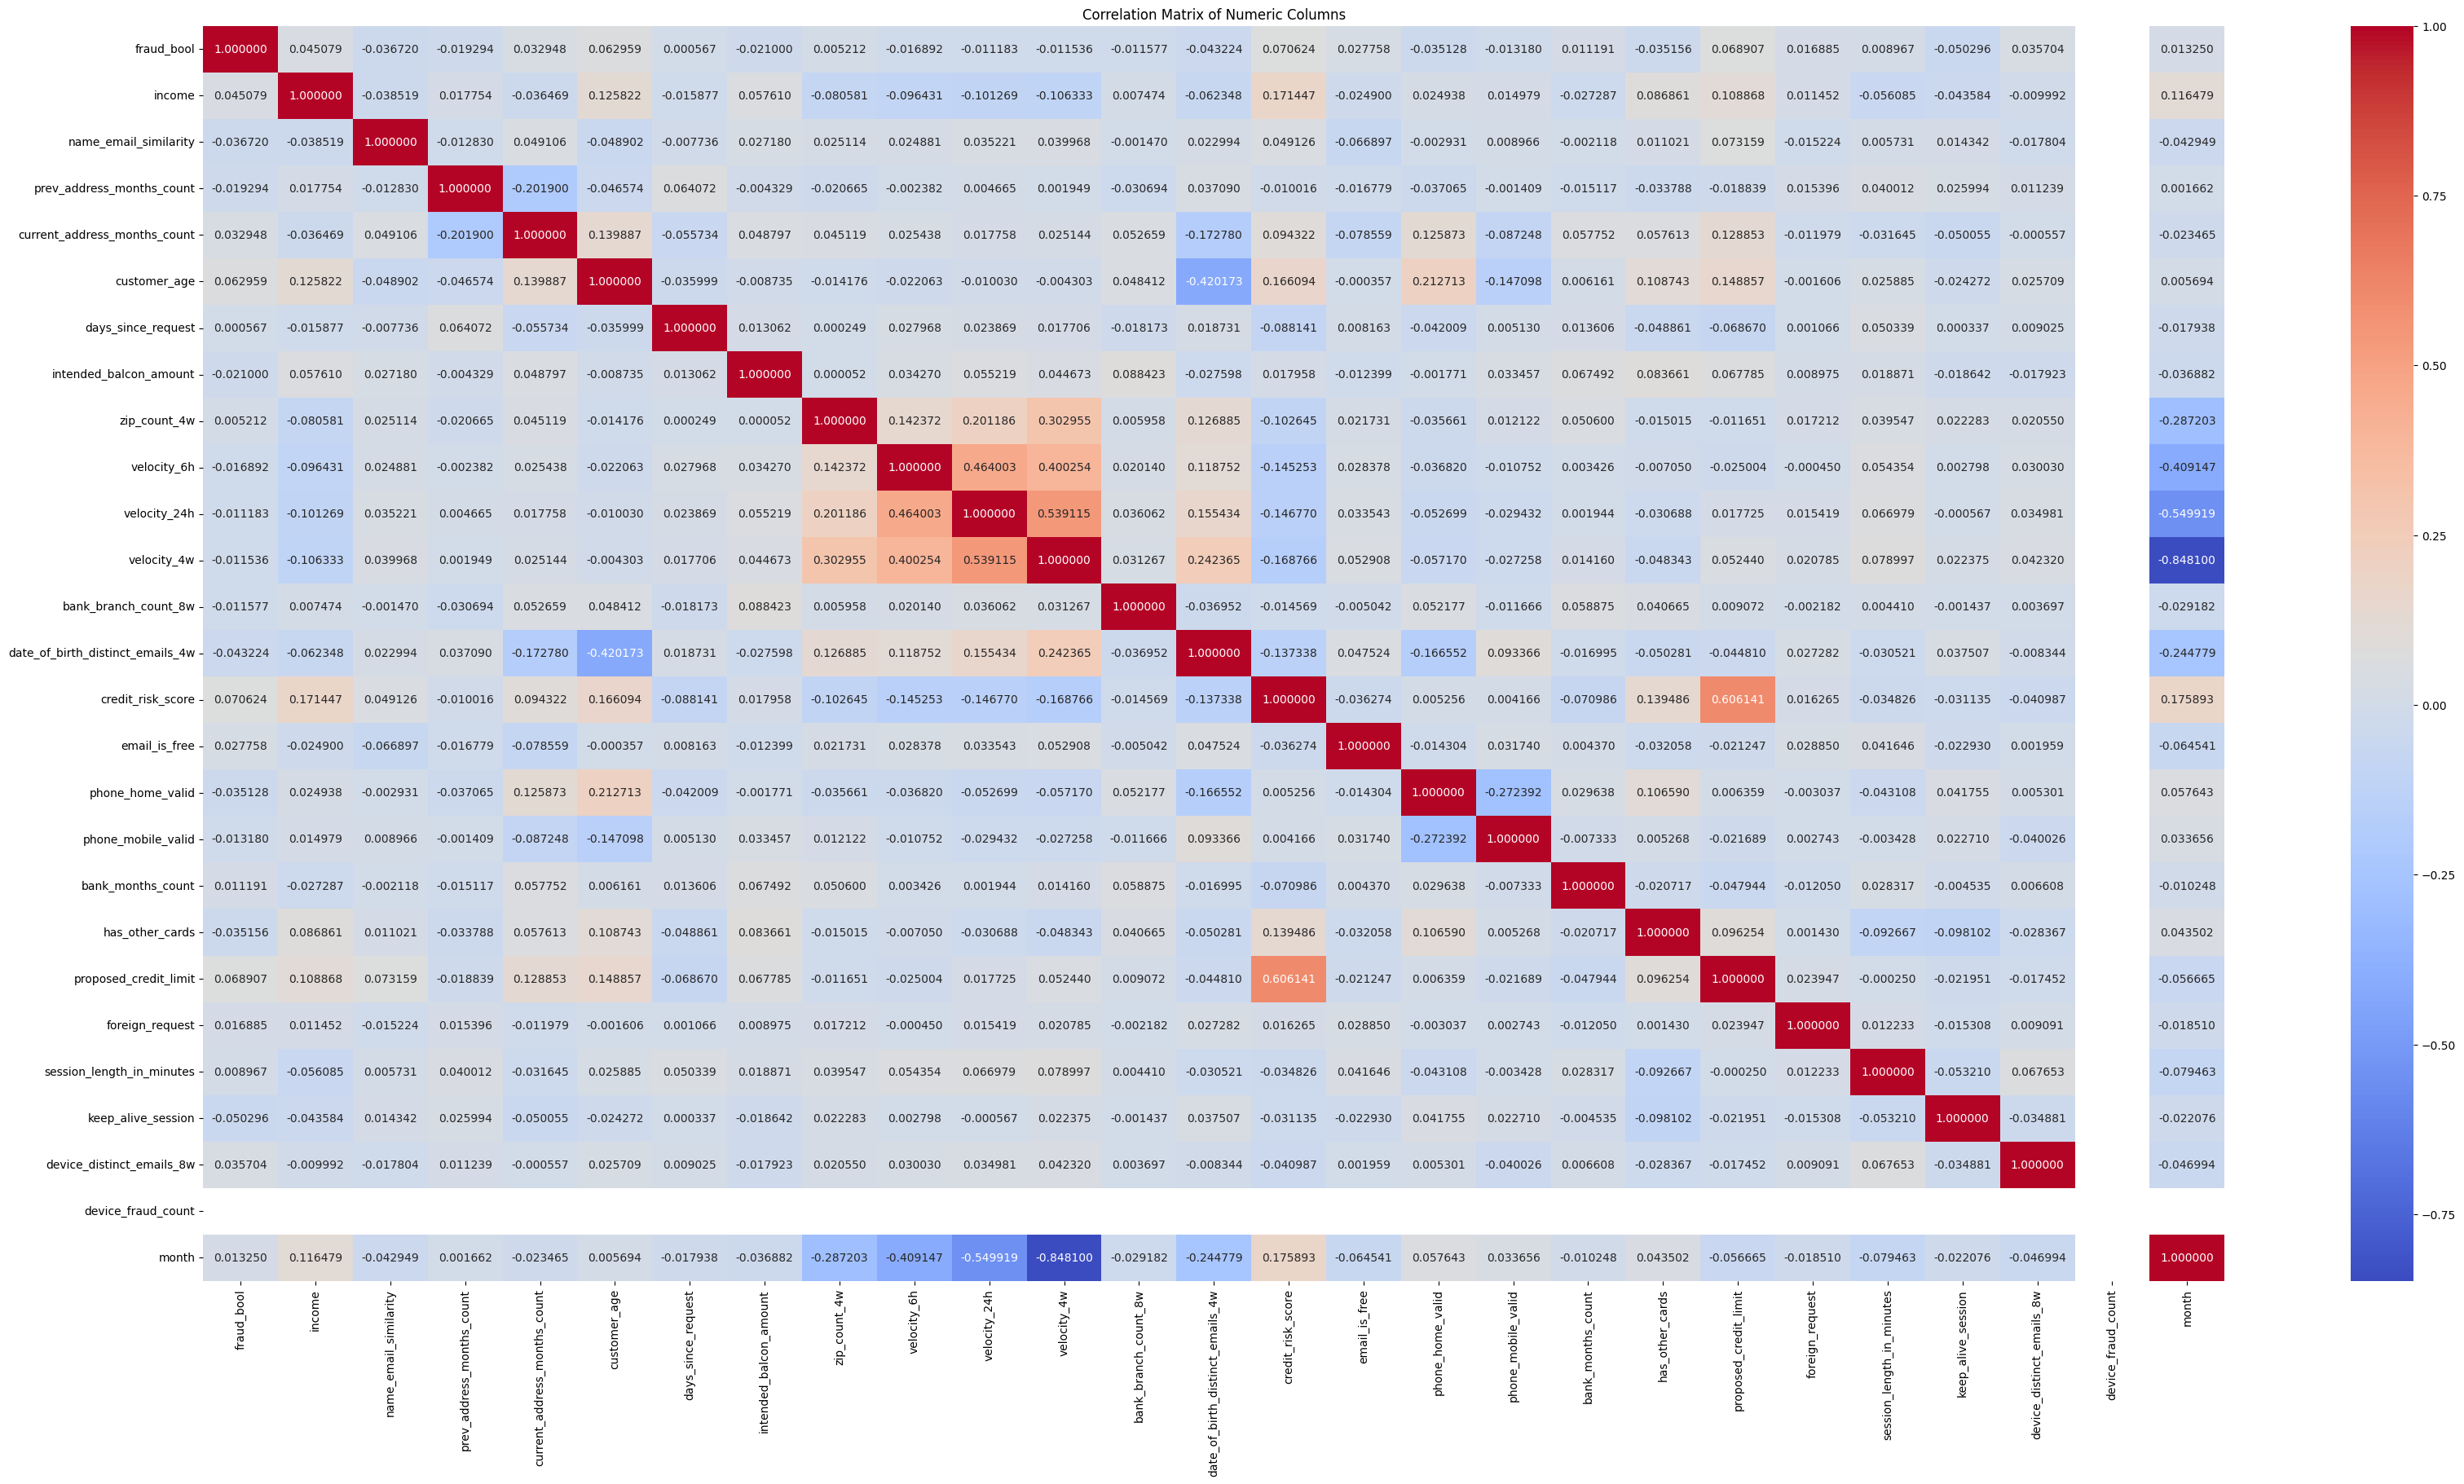

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sm
# Select only numeric columns
numeric_data = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(40,20))
sm.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".6f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

In [ ]:
#ONE HOT ENCODING
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Define the categorical columns
categorical_cols = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']

# Create a ColumnTransformer to apply OneHotEncoder to multiple columns
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'  # Keep the non-categorical columns as they are
)

# Fit and transform the data
X_encoded = ct.fit_transform(df)

# Convert to DataFrame
X_encoded = pd.DataFrame(X_encoded)
df = pd.concat([df,X_encoded])

In [ ]:
print(df)

        fraud_bool  income  name_email_similarity  prev_address_months_count  \
0              0.0     0.3               0.986506                  16.718568   
1              0.0     0.8               0.617426                  16.718568   
2              0.0     0.8               0.996707                   9.000000   
3              0.0     0.6               0.475100                  11.000000   
4              0.0     0.9               0.842307                  16.718568   
...            ...     ...                    ...                        ...   
999995         NaN     NaN                    NaN                        NaN   
999996         NaN     NaN                    NaN                        NaN   
999997         NaN     NaN                    NaN                        NaN   
999998         NaN     NaN                    NaN                        NaN   
999999         NaN     NaN                    NaN                        NaN   

        current_address_months_count  c

In [ ]:
x = df.drop(['fraud_bool'], axis = 1)
y = df['fraud_bool']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)
print(x_train.shape)
y_train.value_counts()

(1200000, 84)


fraud_bool
0.0    593131
1.0      6667
Name: count, dtype: int64

In [ ]:
from sklearn.utils import resample

df_majority = df[df.fraud_bool==0]
df_minority = df[df.fraud_bool==1]

# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                 replace=False,    # sample without replacement
                                 n_samples=150000,     # to match minority class
                                 random_state=123) # reproducible results

# Combine minority class with downsampled majority class
#df = pd.concat([df_majority_downsampled, df_minority])

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=150000,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df = pd.concat([df_majority_downsampled, df_minority_upsampled])

# Display new class counts
df.fraud_bool.value_counts()

fraud_bool
0.0    150000
1.0    150000
Name: count, dtype: int64

In [ ]:
#Z-SCORE NORMALIZATION
def z_score_normalization(dataframe, feature_name):
    # Copy the DataFrame to avoid modifying the original DataFrame
    df_normalized = dataframe.copy()

    # Calculate mean and standard deviation of the selected feature
    mean_val = df_normalized[feature_name].mean()
    std_dev = df_normalized[feature_name].std()

    # Apply Z-score normalization to the selected feature
    df_normalized[feature_name] = (df_normalized[feature_name] - mean_val) / std_dev

    return df_normalized

# Select the feature you want to normalize
feature_to_normalize = 'credit_risk_score'

# Normalize the selected feature using Z-score normalization
df_normalized = z_score_normalization(df, 'credit_risk_score')
df_normalized = z_score_normalization(df_normalized, 'velocity_6h')
df_normalized = z_score_normalization(df_normalized, 'velocity_24h')
df_normalized = z_score_normalization(df_normalized, 'velocity_4w')
df_normalized = z_score_normalization(df_normalized, 'bank_branch_count_8w')
df_normalized = z_score_normalization(df_normalized, 'prev_address_months_count')
df_normalized = z_score_normalization(df_normalized, 'current_address_months_count')
df_normalized = z_score_normalization(df_normalized, 'intended_balcon_amount')

print("ORIGINAL DATAFRAME:\n\n")
print(df['credit_risk_score']);
print(df['velocity_6h']);
print(df['velocity_24h']);
print(df['velocity_4w']);
print(df['bank_branch_count_8w']);
print(df['prev_address_months_count']);
print(df['intended_balcon_amount']);

print("\nNORMALIZED DATAFRAME:\n\n")
print(df_normalized['credit_risk_score'])
print(df_normalized['velocity_6h']);
print(df_normalized['velocity_24h']);
print(df_normalized['velocity_4w']);
print(df_normalized['bank_branch_count_8w']);
print(df_normalized['prev_address_months_count']);
print(df_normalized['intended_balcon_amount']);

ORIGINAL DATAFRAME:


919574    108.0
519186    177.0
265547     72.0
378570    167.0
947728    129.0
          ...  
710282     71.0
723220    125.0
682235    238.0
368690     60.0
717100    244.0
Name: credit_risk_score, Length: 300000, dtype: float64
919574    5936.761409
519186    4306.395440
265547     824.927488
378570    6903.523610
947728    2216.274478
             ...     
710282    1235.991785
723220    5473.510812
682235    3251.826528
368690    3874.449957
717100    2394.914468
Name: velocity_6h, Length: 300000, dtype: float64
919574    3132.247241
519186    4240.824276
265547    3572.425609
378570    4550.392475
947728    3867.317681
             ...     
710282    4589.035553
723220    3689.180662
682235    4910.215658
368690    4863.148794
717100    6207.640282
Name: velocity_24h, Length: 300000, dtype: float64
919574    3104.428486
519186    4882.767555
265547    5535.816642
378570    5474.386012
947728    3161.783808
             ...     
710282    6358.144652
723220 

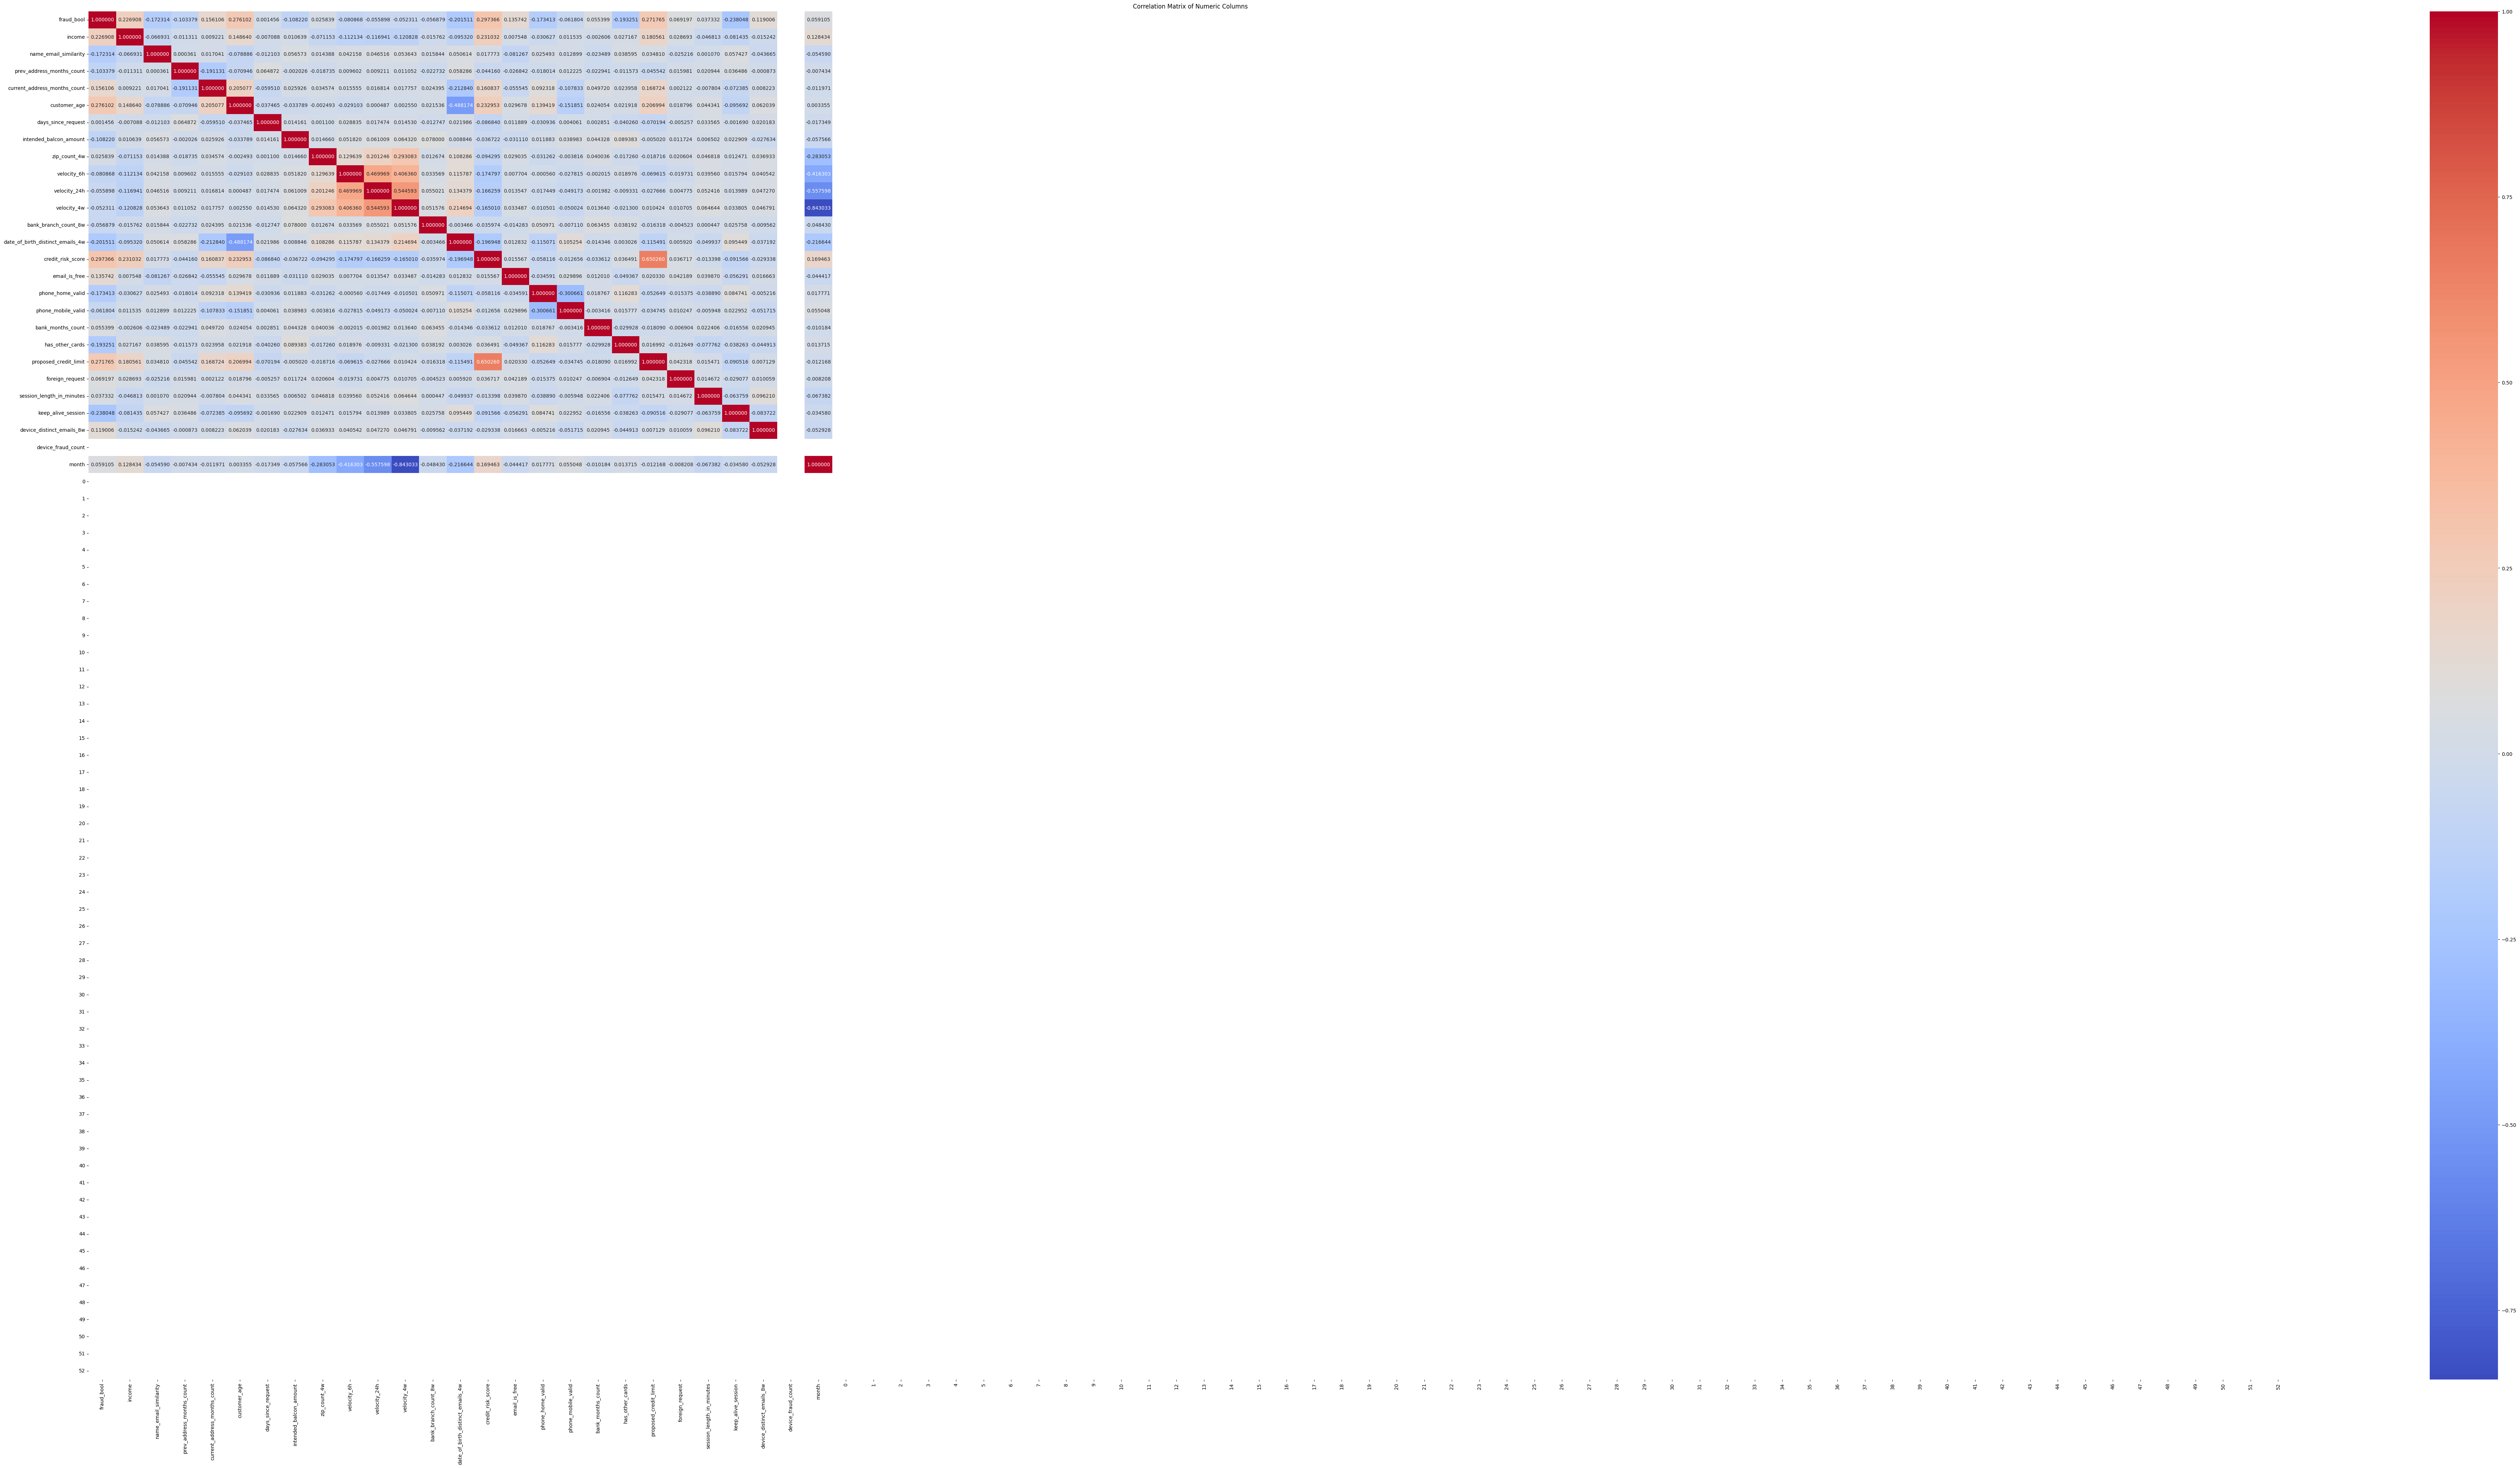

In [ ]:
# Select only numeric columns
numeric_data = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(100,50))
sm.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".6f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

In [ ]:
!jupyter --version

Selected Jupyter core packages...
IPython          : 7.34.0
ipykernel        : 5.5.6
ipywidgets       : 7.7.1
jupyter_client   : 6.1.12
jupyter_core     : 5.7.2
jupyter_server   : 1.24.0
jupyterlab       : not installed
nbclient         : 0.10.0
nbconvert        : 6.5.4
nbformat         : 5.10.3
notebook         : 6.5.5
qtconsole        : not installed
traitlets        : 5.7.1
